importing the required libraries


In [ ]:
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [ ]:
#loading the given customers dataset
customers = pd.read_csv('/content/customers.csv')

In [ ]:
#loading the properties dataset
properties = pd.read_csv('/content/properties.csv')

In [ ]:
customers.head(30)

,Unnamed: 0,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website
5,5,C0088,Individual,Yurem,Wright,3/6/1957,M,USA,California,Home,3,Yes,Website
6,6,C0079,Individual,Xavier,Faulkner,5/24/1947,M,Canada,NaN,Investment,5,No,Website
7,7,C0149,Individual,Kayden,Olsen,10/17/1969,F,USA,California,Home,5,No,Website
8,8,C0064,Individual,Joaquin,Mullins,10/5/1975,M,USA,California,Investment,5,No,Agency
9,9,C0068,Individual,Nicolas,Navarro,6/17/1966,M,USA,Oregon,Investment,3,No,Agency


In [ ]:
print(customers.columns)

Index(['Unnamed: 0', '﻿customerid', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'],
      dtype='object')


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         162 non-null    int64 
 1   ﻿customerid        162 non-null    object
 2   entity             162 non-null    object
 3   name               162 non-null    object
 4   surname            162 non-null    object
 5   birth_date         155 non-null    object
 6   sex                155 non-null    object
 7   country            162 non-null    object
 8   state              154 non-null    object
 9   purpose            162 non-null    object
 10  deal_satisfaction  162 non-null    int64 
 11  mortgage           162 non-null    object
 12  source             162 non-null    object
dtypes: int64(2), object(11)
memory usage: 16.6+ KB


In [ ]:
customers.describe()

,Unnamed: 0,deal_satisfaction
count,162.000000,162.000000
mean,80.500000,3.456790
std,46.909487,1.333276
min,0.000000,1.000000
25%,40.250000,3.000000
50%,80.500000,4.000000
75%,120.750000,5.000000
max,161.000000,5.000000


In [ ]:
customers.shape

(162, 13)

Data Preparation


Checking Datatypes

In [ ]:
print(customers.columns)

Index(['Unnamed: 0', '﻿customerid', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'],
      dtype='object')


In [ ]:
customers.dtypes

,0
Unnamed: 0,int64
﻿customerid,object
entity,object
name,object
surname,object
birth_date,object
sex,object
country,object
state,object
purpose,object


In [ ]:
customers.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
customers['﻿customerid'] = customers['﻿customerid'].str.replace('C', '')

In [ ]:
# Convert the data types of the columns to their appropriate types 'strings'
customers['﻿customerid'] = customers['﻿customerid'].astype('int64')
customers['name'] = customers['name'].astype('string')
customers['surname'] = customers['surname'].astype('string')
customers['entity'] = customers['entity'].astype('string')
customers['sex'] = customers['sex'].astype('string')
customers['country'] = customers['country'].astype('string')
customers['state'] = customers['state'].astype('string')
customers['purpose'] = customers['purpose'].astype('string')
customers['mortgage'] = customers['mortgage'].astype('string')
customers['source'] = customers['source'].astype('string')

In [ ]:
# Convert the data types of the columns to their appropriate types 'date'
customers['birth_date'] = customers['birth_date'].astype('datetime64[ns]')

In [ ]:
customers.dtypes

,0
﻿customerid,int64
entity,string[python]
name,string[python]
surname,string[python]
birth_date,datetime64[ns]
sex,string[python]
country,string[python]
state,string[python]
purpose,string[python]
deal_satisfaction,int64


Column names

In [ ]:
# rename columns
customers.rename(columns={'﻿customerid': 'customerid'}, inplace=True)
customers.rename(columns={'birth_date':'birthdate'}, inplace=True)

Categorical to numerical



Case: If there are inconsistencies with Capitol and lowercases, unify them using the lowercase convention.

In [ ]:
categorical_cols = ['entity',  'sex', 'country', 'state',
       'purpose', 'mortgage', 'source']

In [ ]:
for col in categorical_cols:
  customers[col] = customers[col].str.lower()

In [ ]:
# using label encoder to encode categorical columns
label_encoder = LabelEncoder()

we have first to check the unique values of each column

1 - Entity column

In [ ]:
print(customers['entity'].unique())

<StringArray>
['individual', 'company']
Length: 2, dtype: string


In [ ]:
customers['entity'] = label_encoder.fit_transform(customers['entity'])
print(customers['entity'].unique())

[1 0]


In [ ]:
print(customers['sex'].unique())

<StringArray>
['f', 'm', <NA>]
Length: 3, dtype: string


In [ ]:
customers['sex'].fillna('Unknown', inplace=True)

<ipython-input-22-78d9f46d977a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers['sex'].fillna('Unknown', inplace=True)


In [ ]:
customers['sex'] = label_encoder.fit_transform(customers['sex'])
print(customers['sex'].unique())

[1 2 0]


In [ ]:
customers['country'] = customers['country'].str.strip().str.lower()

In [ ]:
print(customers['country'].unique())

<StringArray>
['usa', 'canada', 'germany', 'belgium', 'mexico', 'russia', 'uk', 'denmark']
Length: 8, dtype: string


In [ ]:
customers['country'] = label_encoder.fit_transform(customers['country'])
print(customers['country'].unique())

[7 1 3 0 4 5 6 2]


In [ ]:
customers['country'].iloc[0]

7

In [ ]:
print(customers['state'].unique())

<StringArray>
['california',         <NA>,     'oregon',    'arizona',     'nevada',
   'colorado',       'utah',   'virginia',    'wyoming',     'kansas']
Length: 10, dtype: string


In [ ]:
customers['state'].fillna('unknown',inplace=True)

<ipython-input-29-afedab318504>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers['state'].fillna('unknown',inplace=True)


In [ ]:
customers['state'] = label_encoder.fit_transform(customers['state'])
print(customers['state'].unique())

[1 6 5 0 4 2 7 8 9 3]


In [ ]:
print(customers['purpose'].unique())

<StringArray>
['home', 'investment']
Length: 2, dtype: string


In [ ]:
customers['purpose'] = label_encoder.fit_transform(customers['purpose'])
print(customers['purpose'].unique())

[0 1]


In [ ]:
print(customers['mortgage'].unique())

<StringArray>
['yes', 'no']
Length: 2, dtype: string


In [ ]:
customers['mortgage'] = label_encoder.fit_transform(customers['mortgage'])
print(customers['mortgage'].unique())

[1 0]


In [ ]:
print(customers['source'].unique())

<StringArray>
['website', 'agency', 'client']
Length: 3, dtype: string


In [ ]:
customers['source'] = label_encoder.fit_transform(customers['source'])
print(customers['source'].unique())

[2 0 1]


In [ ]:
customers['customerid'].unique()

array([110,  10, 132, 137, 174,  88,  79, 149,  64,  68,   6,  55,  16,
       121,  74,  32,  93,  76, 165, 153, 129, 162,  71,  69,   5, 144,
        20, 101, 128,  33, 171,  95, 123,  15,  84,  19,  53,  80,  70,
        51,  22, 127,  81, 104,  73, 168, 169,  39,  86,  36,  45, 105,
       119,  12,  65,  54, 172,  29,  98, 142, 135,  37, 134,  91,  18,
        85,  61,  66, 156,  43, 112, 145,  47,  82,   7,  52,  41,   4,
       118,  30, 154, 125, 115,  78, 151, 111,  14, 103,  24, 166,  67,
       122, 107,   3,  99, 160,  13,  59, 120, 150, 140,   2,  96, 159,
       163, 100, 155,  49, 148, 146,  34, 141,   8, 131,  89, 157, 114,
       124, 158, 175,  23, 164,  58,  62,  42,  48,  83,  25,  87,  94,
        38,  11, 139,  21, 106,  40,  35, 126, 136, 109,  28,  57, 130,
        44,  56,  77,  31,  72,  63,  17,   9,  75,  27,  60,   1,  90,
       108, 170, 138, 113, 147, 133])

In [ ]:
properties_ids = [' 0028 ', ' 0027 ', ' 0112 ', ' 0160 ', ' 0014 ', ' 0125 ',
       ' 0166 ', ' 0034 ', ' 0170 ', ' 0009 ', ' 0041 ', ' 0057 ',
       ' 0061 ', ' 0089 ', ' 0159 ', ' 0171 ', ' 0042 ', ' 0093 ',
       ' 0051 ', ' 0064 ', ' 0128 ', ' 0019 ', ' 0037 ', ' 0127 ',
       ' 0018 ', ' 0040 ', ' 0080 ', ' 0083 ', ' 0085 ', ' 0091 ',
       ' 0007 ', ' 0048 ', ' 0065 ', ' 0096 ', ' 0164 ', ' 0038 ',
       ' 0087 ', ' 0142 ', ' 0015 ', ' 0122 ', ' 0017 ', ' 0020 ',
       ' 0086 ', ' 0150 ', ' 0156 ', ' 0169 ', ' 0022 ', ' 0072 ',
       ' 0136 ', ' 0149 ', ' 0011 ', ' 0073 ', ' 0110 ', ' 0111 ',
       ' 0123 ', ' 0070 ', ' 0075 ', ' 0076 ', ' 0105 ', ' 0135 ',
       ' 0153 ', ' 0047 ', ' 0060 ', ' 0066 ', ' 0068 ', ' 0090 ',
       ' 0095 ', ' 0151 ', ' 0162 ', ' 0010 ', ' 0054 ', ' 0056 ',
       ' 0081 ', ' 0084 ', ' 0016 ', ' 0035 ', ' 0062 ', ' 0099 ',
       ' 0114 ', ' 0006 ', ' 0053 ', ' 0069 ', ' 0077 ', ' 0168 ',
       ' 0058 ', ' 0107 ', ' 0131 ', ' 0144 ', ' 0098 ', ' 0130 ',
       ' 0141 ', ' 0067 ', ' 0082 ', ' 0113 ', ' 0132 ', ' 0137 ',
       ' 0155 ', ' 0163 ', ' 0039 ', ' 0071 ', ' 0101 ', ' 0146 ',
       ' 0052 ', ' 0063 ', ' 0088 ', ' 0094 ', ' 0165 ', ' 0044 ',
       ' 0157 ', ' 0118 ', ' 0119 ', ' 0033 ', ' 0100 ', ' 0133 ',
       ' 0175 ', ' 0008 ', ' 0023 ', ' 0108 ', ' 0109 ', ' 0145 ',
       ' 0003 ', ' 0004 ', ' 0024 ', ' 0030 ', ' 0147 ', ' 0002 ',
       ' 0031 ', ' 0059 ', ' 0140 ', ' 0043 ', ' 0078 ', ' 0124 ',
       ' 0049 ', ' 0079 ', ' 0013 ', ' 0139 ', ' 0154 ', ' 0045 ',
       ' 0134 ', ' 0138 ', ' 0158 ', ' 0036 ', ' 0074 ', ' 0120 ',
       ' 0005 ', ' 0032 ', ' 0126 ', ' 0106 ', ' 0115 ', ' 0129 ',
       ' 0103 ', ' 0021 ', ' 0148 ', ' 0172 ', ' 0104 ', ' 0001 ',
       ' 0012 ', ' 0025 ', ' 0029 ', ' 0055 ', ' 0121 ', ' 0174 ']
properties_ids = [int(property_id.strip()) for property_id in properties_ids]

In [ ]:
customer_ids =[110,  10, 132, 137, 174,  88,  79, 149,  64,  68,   6,  55,  16,
       121,  74,  32,  93,  76, 165, 153, 129, 162,  71,  69,   5, 144,
        20, 101, 128,  33, 171,  95, 123,  15,  84,  19,  53,  80,  70,
        51,  22, 127,  81, 104,  73, 168, 169,  39,  86,  36,  45, 105,
       119,  12,  65,  54, 172,  29,  98, 142, 135,  37, 134,  91,  18,
        85,  61,  66, 156,  43, 112, 145,  47,  82,   7,  52,  41,   4,
       118,  30, 154, 125, 115,  78, 151, 111,  14, 103,  24, 166,  67,
       122, 107,   3,  99, 160,  13,  59, 120, 150, 140,   2,  96, 159,
       163, 100, 155,  49, 148, 146,  34, 141,   8, 131,  89, 157, 114,
       124, 158, 175,  23, 164,  58,  62,  42,  48,  83,  25,  87,  94,
        38,  11, 139,  21, 106,  40,  35, 126, 136, 109,  28,  57, 130,
        44,  56,  77,  31,  72,  63,  17,   9,  75,  27,  60,   1,  90,
       108, 170, 138, 113, 147, 133]


In [ ]:
# Subtract list2 from list1
result = [x for x in customer_ids if x not in properties]
print(result)

[110, 10, 132, 137, 174, 88, 79, 149, 64, 68, 6, 55, 16, 121, 74, 32, 93, 76, 165, 153, 129, 162, 71, 69, 5, 144, 20, 101, 128, 33, 171, 95, 123, 15, 84, 19, 53, 80, 70, 51, 22, 127, 81, 104, 73, 168, 169, 39, 86, 36, 45, 105, 119, 12, 65, 54, 172, 29, 98, 142, 135, 37, 134, 91, 18, 85, 61, 66, 156, 43, 112, 145, 47, 82, 7, 52, 41, 4, 118, 30, 154, 125, 115, 78, 151, 111, 14, 103, 24, 166, 67, 122, 107, 3, 99, 160, 13, 59, 120, 150, 140, 2, 96, 159, 163, 100, 155, 49, 148, 146, 34, 141, 8, 131, 89, 157, 114, 124, 158, 175, 23, 164, 58, 62, 42, 48, 83, 25, 87, 94, 38, 11, 139, 21, 106, 40, 35, 126, 136, 109, 28, 57, 130, 44, 56, 77, 31, 72, 63, 17, 9, 75, 27, 60, 1, 90, 108, 170, 138, 113, 147, 133]


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customerid         162 non-null    int64         
 1   entity             162 non-null    int64         
 2   name               162 non-null    string        
 3   surname            162 non-null    string        
 4   birthdate          155 non-null    datetime64[ns]
 5   sex                162 non-null    int64         
 6   country            162 non-null    int64         
 7   state              162 non-null    int64         
 8   purpose            162 non-null    int64         
 9   deal_satisfaction  162 non-null    int64         
 10  mortgage           162 non-null    int64         
 11  source             162 non-null    int64         
dtypes: datetime64[ns](1), int64(9), string(2)
memory usage: 15.3 KB


In [ ]:
customers.head()

,customerid,entity,name,surname,birthdate,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,110,1,Kareem,Liu,1968-05-11,1,7,1,0,4,1,2
1,10,1,Trystan,Oconnor,1962-11-26,2,7,1,0,1,0,2
2,132,1,Kale,Gay,1959-04-07,2,7,1,0,4,1,0
3,137,1,Russell,Gross,1959-11-25,2,7,1,0,5,0,2
4,174,0,Marleez,Co,NaT,0,7,1,1,5,0,2


In [ ]:
# For customers dataframe
customers.isnull().sum()

,0
customerid,0
entity,0
name,0
surname,0
birthdate,7
sex,0
country,0
state,0
purpose,0
deal_satisfaction,0


In [ ]:
missing_percentage = (customers.isnull().mean() * 100).round(2)
print(missing_percentage)

customerid           0.00
entity               0.00
name                 0.00
surname              0.00
birthdate            4.32
sex                  0.00
country              0.00
state                0.00
purpose              0.00
deal_satisfaction    0.00
mortgage             0.00
source               0.00
dtype: float64


Using missingno package

<Axes: >

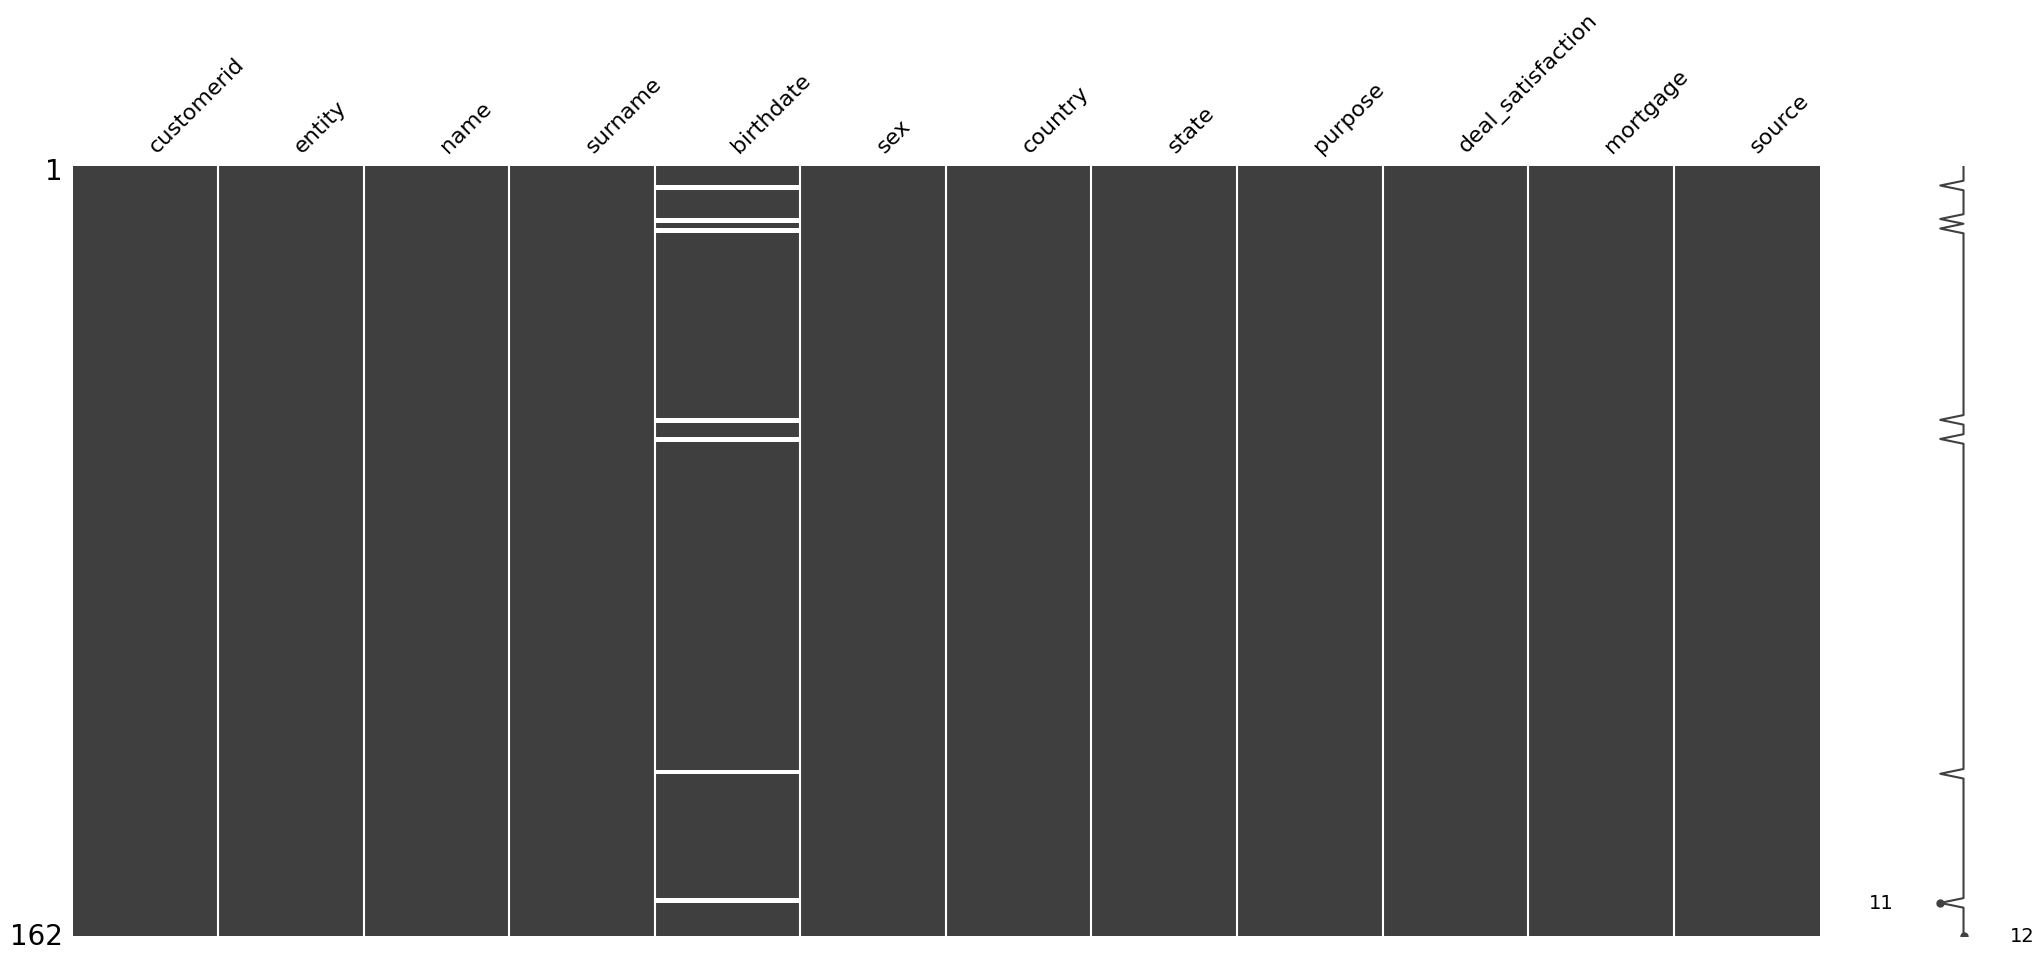

In [ ]:
msno.matrix(customers)

In [ ]:
customers.sort_values(by='birthdate', inplace=True)
customers['birthdate'].fillna(method='ffill', inplace=True)

<ipython-input-46-e8096efc523e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers['birthdate'].fillna(method='ffill', inplace=True)
<ipython-input-46-e8096efc523e>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  customers['birthdate'].fillna(method='ffill', inplace=True)


In [ ]:
customers.shape

(162, 12)

Properties Dataset Cleaning and Preprocessing

In [ ]:
properties.head()

,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [ ]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  267 non-null    int64  
 1   ﻿id         267 non-null    int64  
 2   building    267 non-null    int64  
 3   date_sale   267 non-null    object 
 4   type        267 non-null    object 
 5   property#   267 non-null    int64  
 6   area        267 non-null    float64
 7   price       267 non-null    object 
 8   status      267 non-null    object 
 9   customerid  195 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 21.0+ KB


In [ ]:
print(properties.columns)

Index(['Unnamed: 0', '﻿id', 'building', 'date_sale', 'type', 'property#',
       'area', 'price', 'status', 'customerid'],
      dtype='object')


In [ ]:
properties.shape

(267, 10)

Data preparation

In [ ]:
properties['customerid'] = properties['customerid'].str.replace('C', '')

In [ ]:
properties.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
properties.drop(columns=['﻿id'], inplace=True)


Data dtypes

In [ ]:
properties.dtypes

,0
building,int64
date_sale,object
type,object
property#,int64
area,float64
price,object
status,object
customerid,object


In [ ]:
properties['customerid'].unique()

array([' 0028 ', ' 0027 ', ' 0112 ', ' 0160 ', ' 0014 ', ' 0125 ',
       ' 0166 ', ' 0034 ', ' 0170 ', ' 0009 ', ' 0041 ', ' 0057 ',
       ' 0061 ', ' 0089 ', ' 0159 ', ' 0171 ', ' 0042 ', ' 0093 ',
       ' 0051 ', ' 0064 ', ' 0128 ', ' 0019 ', ' 0037 ', ' 0127 ',
       ' 0018 ', ' 0040 ', ' 0080 ', ' 0083 ', ' 0085 ', ' 0091 ',
       ' 0007 ', ' 0048 ', ' 0065 ', ' 0096 ', ' 0164 ', ' 0038 ',
       ' 0087 ', ' 0142 ', ' 0015 ', ' 0122 ', ' 0017 ', ' 0020 ',
       ' 0086 ', ' 0150 ', ' 0156 ', ' 0169 ', ' 0022 ', ' 0072 ',
       ' 0136 ', ' 0149 ', ' 0011 ', ' 0073 ', ' 0110 ', ' 0111 ',
       ' 0123 ', ' 0070 ', ' 0075 ', ' 0076 ', ' 0105 ', ' 0135 ',
       ' 0153 ', ' 0047 ', ' 0060 ', ' 0066 ', ' 0068 ', ' 0090 ',
       ' 0095 ', ' 0151 ', ' 0162 ', ' 0010 ', ' 0054 ', ' 0056 ',
       ' 0081 ', ' 0084 ', ' 0016 ', ' 0035 ', ' 0062 ', ' 0099 ',
       ' 0114 ', ' 0006 ', ' 0053 ', ' 0069 ', ' 0077 ', ' 0168 ',
       ' 0058 ', ' 0107 ', ' 0131 ', ' 0144 ', ' 0098 ', ' 013

In [ ]:
# Remove leading and trailing spaces and any non-numeric characters
properties['customerid'] = properties['customerid'].str.replace(r'\D', '', regex=True)
properties['customerid'] = properties['customerid'].astype(float).astype('Int64')  # Convert to Nullable Integer

In [ ]:
# Define the list of possible imputation values
impute_values = [110, 10, 132, 137, 174, 88, 79, 149, 64, 68, 6, 55, 16, 121, 74, 32, 93, 76, 165, 153, 129, 162, 71, 69, 5, 144, 20, 101, 128, 33, 171, 95, 123, 15, 84, 19, 53, 80, 70, 51, 22, 127, 81, 104, 73, 168, 169, 39, 86, 36, 45, 105, 119, 12, 65, 54, 172, 29, 98, 142, 135, 37, 134, 91, 18, 85, 61, 66, 156, 43, 112, 145, 47, 82, 7, 52, 41, 4, 118, 30, 154, 125, 115, 78, 151, 111, 14, 103, 24, 166, 67, 122, 107, 3, 99, 160, 13, 59, 120, 150, 140, 2, 96, 159, 163, 100, 155, 49, 148, 146, 34, 141, 8, 131, 89, 157, 114, 124, 158, 175, 23, 164, 58, 62, 42, 48, 83, 25, 87, 94, 38, 11, 139, 21, 106, 40, 35, 126, 136, 109, 28, 57, 130, 44, 56, 77, 31, 72, 63, 17, 9, 75, 27, 60, 1, 90, 108, 170, 138, 113, 147, 133]

# Iterate through the DataFrame to replace NaN values
for value in impute_values:
    properties['customerid'].fillna(value=value, inplace=True)

# If there are still NaN values left, you can fill them with a default value, for example, -1
properties['customerid'].fillna(value=-1, inplace=True)

<ipython-input-70-847b3f12dcd4>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  properties['customerid'].fillna(value=value, inplace=True)
<ipython-input-70-847b3f12dcd4>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
properties['customerid'].unique()

<IntegerArray>
[ 28,  27, 112, 160,  14, 125, 166,  34, 170,   9,
 ...
 148, 172, 104,   1,  12,  25,  29,  55, 121, 174]
Length: 162, dtype: Int64

In [ ]:
properties['type'] = properties['type'].astype('string')
properties['status'] = properties['status'].astype('string')

In [ ]:
properties['date_sale'] = pd.to_datetime(properties['date_sale'], format='%m/%d/%Y', errors='coerce')

In [ ]:
properties.rename(columns={'property#':'property','date_sale':'datesale'},inplace=True )

In [ ]:
properties.head(10)

,building,datesale,type,property,area,price,status,customerid
0,1,2005-11-01,Apartment,30,743.09,"$246,172.68",Sold,28
1,1,2005-10-01,Apartment,29,756.21,"$246,331.90",Sold,27
2,2,2007-07-01,Apartment,2,587.28,"$209,280.91",Sold,112
3,2,2007-12-01,Apartment,31,1604.75,"$452,667.01",Sold,160
4,1,2004-11-01,Apartment,49,1375.45,"$467,083.31",Sold,14
5,3,2007-09-01,Apartment,11,675.19,"$203,491.85",Sold,125
6,3,2007-09-01,Apartment,26,670.89,"$212,520.83",Sold,125
7,3,2008-01-01,Apartment,23,720.81,"$198,591.85",Sold,166
8,1,2006-06-01,Apartment,31,782.25,"$265,467.68",Sold,34
9,4,2006-03-01,Apartment,23,794.52,"$235,633.26",Sold,170


In [ ]:
properties.dtypes

,0
building,int64
datesale,datetime64[ns]
type,string[python]
property,int64
area,float64
price,object
status,string[python]
customerid,Int64


In [ ]:
categorical_cols = ['status', 'type']

In [ ]:
properties['status'] = properties['status'].str.lower()

In [ ]:
properties['status'].unique()

<StringArray>
[' sold ', '-']
Length: 2, dtype: string

In [ ]:
properties['status'] = properties['status'].replace('-', 'unknown')

In [ ]:
properties['status'] = label_encoder.fit_transform(properties['status'])

In [ ]:
properties['status'].unique()

array([0, 1])

In [ ]:
properties['type'] = properties['type'].str.lower()

In [ ]:
properties['type'].unique()

<StringArray>
['apartment', 'office']
Length: 2, dtype: string

In [ ]:
properties['type'] = label_encoder.fit_transform(properties['type'])

In [ ]:
properties.head(10)

,building,datesale,type,property,area,price,status,customerid
0,1,2005-11-01,0,30,743.09,"$246,172.68",0,28
1,1,2005-10-01,0,29,756.21,"$246,331.90",0,27
2,2,2007-07-01,0,2,587.28,"$209,280.91",0,112
3,2,2007-12-01,0,31,1604.75,"$452,667.01",0,160
4,1,2004-11-01,0,49,1375.45,"$467,083.31",0,14
5,3,2007-09-01,0,11,675.19,"$203,491.85",0,125
6,3,2007-09-01,0,26,670.89,"$212,520.83",0,125
7,3,2008-01-01,0,23,720.81,"$198,591.85",0,166
8,1,2006-06-01,0,31,782.25,"$265,467.68",0,34
9,4,2006-03-01,0,23,794.52,"$235,633.26",0,170


Missing values

In [ ]:
properties.isna().sum()

,0
building,0
datesale,72
type,0
property,0
area,0
price,0
status,0
customerid,0


<Axes: >

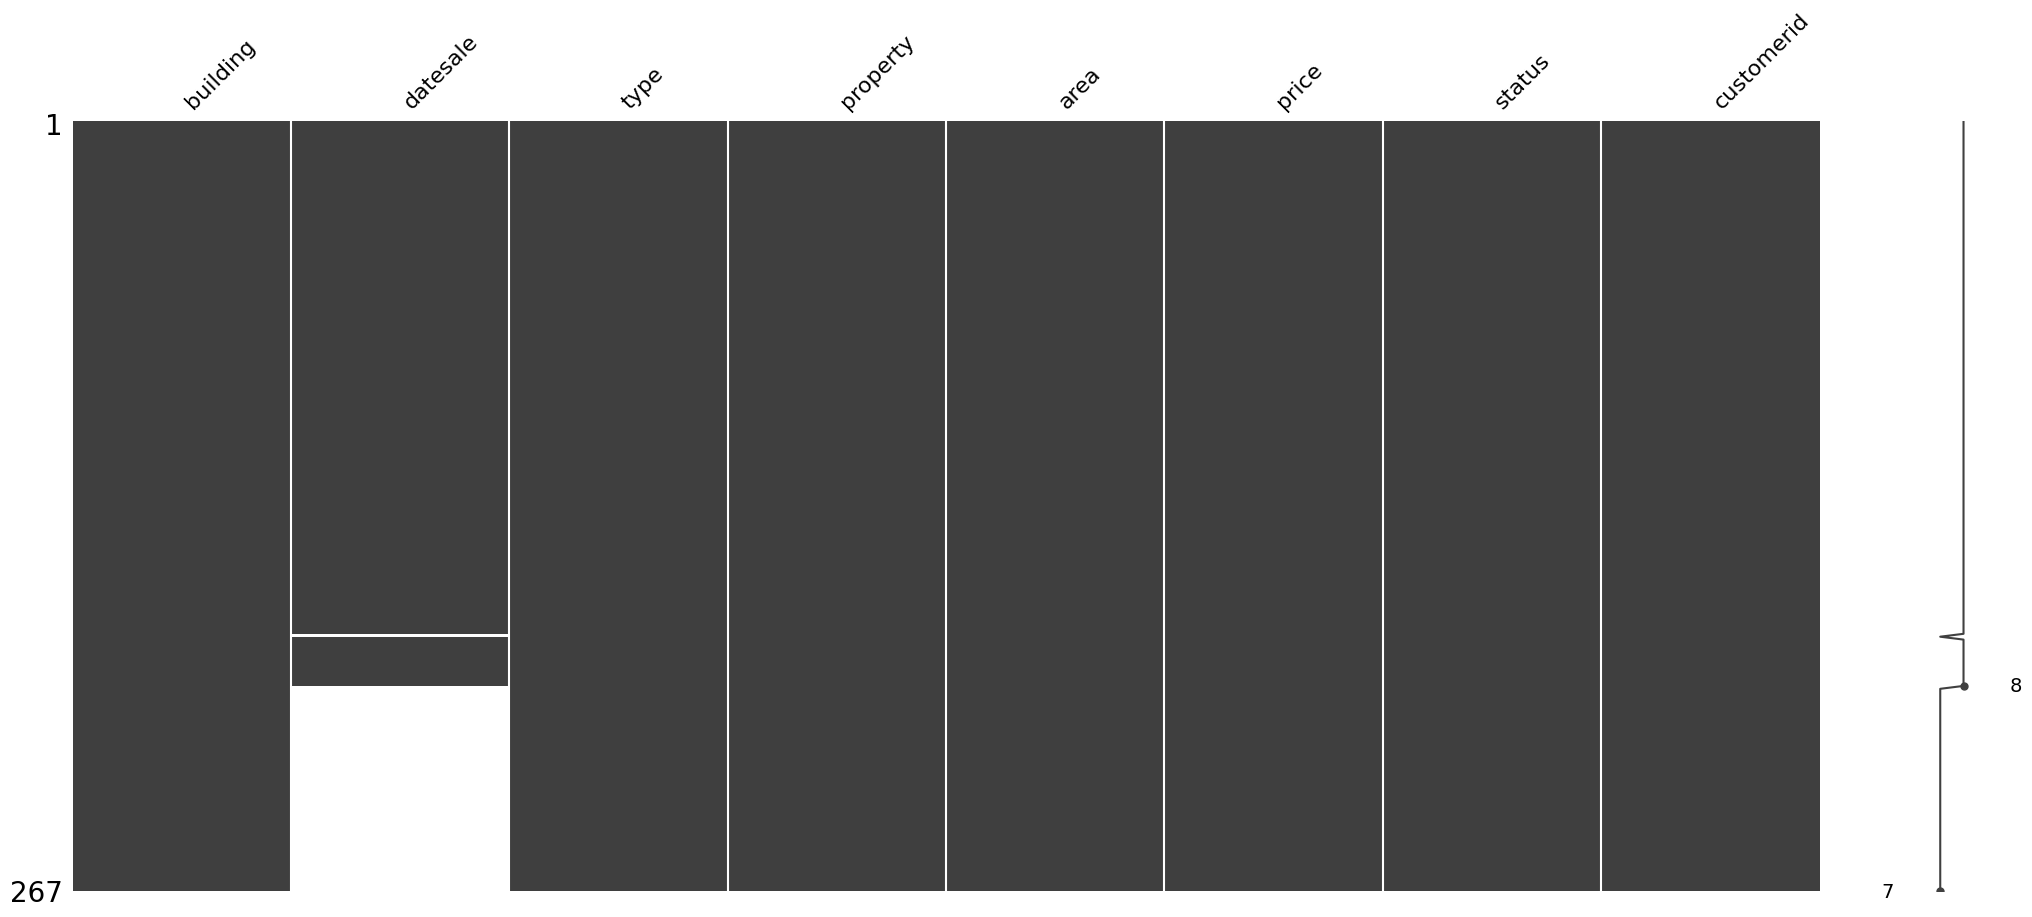

In [ ]:
msno.matrix(properties)

In [ ]:
missing_values = ((properties.isna().sum() * 100)/ properties.shape[0]).round()

In [ ]:
print(missing_values)

building       0.0
datesale      27.0
type           0.0
property       0.0
area           0.0
price          0.0
status         0.0
customerid     0.0
dtype: float64


Datesale column missing values

In [ ]:
properties.sort_values(by='datesale', inplace=True)

In [ ]:
properties['datesale'].fillna(method='ffill', inplace=True)

<ipython-input-92-c60183564ce6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  properties['datesale'].fillna(method='ffill', inplace=True)
<ipython-input-92-c60183564ce6>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  properties['datesale'].fillna(method='ffill', inplace=True)


In [ ]:
properties.head(10)

,building,datesale,type,property,area,price,status,customerid
137,1,2004-03-01,1,2,1238.58,"$410,932.67",0,2
186,2,2004-03-01,0,1,587.28,"$169,158.29",0,121
179,1,2004-03-01,1,5,410.71,"$117,564.07",0,1
132,1,2004-06-01,0,44,827.87,"$229,464.71",0,3
133,1,2004-06-01,0,43,1160.36,"$377,313.56",0,4
83,1,2004-08-01,0,38,743.09,"$207,581.43",0,6
164,1,2004-08-01,0,33,1434.09,"$412,856.56",0,5
33,1,2004-10-01,0,18,625.80,"$191,389.87",0,7
53,1,2004-10-01,0,35,827.87,"$238,811.06",0,11
72,1,2004-10-01,0,45,756.21,"$248,525.12",0,10


In [ ]:
properties.isna().sum()

,0
building,0
datesale,0
type,0
property,0
area,0
price,0
status,0
customerid,0


In [ ]:
properties['customerid']

,customerid
137,2
186,121
179,1
132,3
133,4
...,...
262,110
263,110
264,110
265,110


In [ ]:
# Assuming 'customers' and 'properties' are your DataFrames
common_customer_ids = set(customers['customerid']).intersection(properties['customerid'])

if common_customer_ids:
    print("Common customer IDs found:")
    print(common_customer_ids)
else:
    print("No common customer IDs found.")

Common customer IDs found:
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 174, 175}


Merging the two datasets


Right Join: Similar to the left join but returns all rows from the right dataset and the matching rows from the left dataset.

In [ ]:
data  = customers.merge(properties, on='customerid', how='outer')

In [ ]:
data.shape

(267, 19)

In [ ]:
data.head(20)

,customerid,entity,name,surname,birthdate,sex,country,state,purpose,deal_satisfaction,mortgage,source,building,datesale,type,property,area,price,status
0,1,0,Kamd,Co,1986-06-21,0,7,1,1,5,0,0,1,2004-03-01,1,5,410.71,"$117,564.07",0
1,2,1,Jack,Anderson,1947-02-13,2,7,1,1,5,1,2,1,2004-03-01,1,2,1238.58,"$410,932.67",0
2,3,1,Avah,Huang,1948-04-23,1,7,1,0,5,0,2,1,2004-06-01,0,44,827.87,"$229,464.71",0
3,4,1,Nora,Lynch,1948-04-23,1,7,1,0,5,0,2,1,2004-06-01,0,43,1160.36,"$377,313.56",0
4,5,1,Rodolfo,Gibson,1937-01-20,2,7,4,0,2,1,2,1,2004-08-01,0,33,1434.09,"$412,856.56",0
5,6,1,Laci,Guerra,1956-06-17,1,7,1,0,2,1,2,1,2004-08-01,0,38,743.09,"$207,581.43",0
6,7,1,Jaelyn,Berger,1970-05-05,1,7,1,0,3,0,2,1,2004-10-01,0,18,625.80,"$191,389.87",0
7,8,1,Arthur,Bray,1949-07-14,2,7,7,1,4,0,0,1,2004-10-01,0,21,756.21,"$218,585.92",0
8,9,1,Arabella,Ferrell,1976-08-17,1,7,5,0,1,0,0,1,2004-10-01,0,36,1160.36,"$317,473.86",0
9,10,1,Trystan,Oconnor,1962-11-26,2,7,1,0,1,0,2,1,2004-10-01,0,45,756.21,"$248,525.12",0


In [ ]:
print(((data.isna().sum()) * 100 / data.shape[0]).round(2))

customerid           0.0
entity               0.0
name                 0.0
surname              0.0
birthdate            0.0
sex                  0.0
country              0.0
state                0.0
purpose              0.0
deal_satisfaction    0.0
mortgage             0.0
source               0.0
building             0.0
datesale             0.0
type                 0.0
property             0.0
area                 0.0
price                0.0
status               0.0
dtype: float64


In [ ]:
data.dtypes

,0
customerid,int64
entity,int64
name,string[python]
surname,string[python]
birthdate,datetime64[ns]
sex,int64
country,int64
state,int64
purpose,int64
deal_satisfaction,int64


In [ ]:
# Assume df is your DataFrame

# Define a dictionary to specify data types for each column
dtypes_dict = {
    'customerid': 'int64',
    'entity': 'int64',
    'name': 'string',
    'surname': 'string',
    'birthdate': 'datetime64',
    'sex': 'int64',
    'country': 'int64',
    'state': 'int64',
    'purpose': 'int64',
    'deal_satisfaction': 'int64',
    'mortgage': 'int64',
    'source': 'int64',
    'building': 'int64',
    'datesale': 'datetime64',
    'type': 'int64',
    'property': 'int64',
    'area': 'float64',
    'price': 'float64',
    'status': 'int64'
}

# Save the DataFrame to CSV with specified data types
data.to_csv('preprocessed_data.csv', index=False)